In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import geopandas as gpd
from datetime import datetime as dt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
import matplotlib.ticker as mticker

In [2]:
pop=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\New_York_City_Population_By_Census_Tracts.csv')
ct=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\census_tracts.csv')
mbta=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\monthly_by_tract.csv')

In [3]:
mbta.rename(columns=dict(zip(mbta.columns[2:], mbta.columns[2:].str[:-2])), inplace=True)

In [4]:
mbta['created_date'] = pd.to_datetime(mbta['created_date'])
mbta2010 = mbta[mbta['created_date'].dt.year==2010]

In [5]:
tracts = mbta.columns[~mbta.columns.isin(['complaint_type', 'created_date'])]
calls2010 = mbta2010[tracts].sum(axis=0)

In [6]:
pop.head()

Borough  Year  FIPS County Code  DCP Borough Code  Census Tract  Population
0   Bronx  2000                 5                 2           100       12780
1   Bronx  2000                 5                 2           200        3545
2   Bronx  2000                 5                 2           400        3314
3   Bronx  2000                 5                 2          1600        5237
4   Bronx  2000                 5                 2          1900        1584

In [7]:
pop2010 = pop[pop['Year']==2010]

In [8]:
pop2010['Population'].sum()

8175133

In [9]:
pop2010.sort_values(by='Population', ascending=False).head()

Borough  Year  FIPS County Code  DCP Borough Code  Census Tract  \
2502      Bronx  2010                 5                 2         46201   
3312  Manhattan  2010                61                 1          4400   
3404  Manhattan  2010                61                 1         13600   
3522  Manhattan  2010                61                 1         24500   
3425  Manhattan  2010                61                 1         15400   

      Population  
2502       26588  
3312       16538  
3404       15344  
3522       14934  
3425       13749

In [10]:
ct.head()

boro_code  boro_ct201      boro_name cdeligibil  ct2010  ctlabel  \
0          5     5000900  Staten Island          I     900      9.0   
1          1     1009800      Manhattan          I    9800     98.0   
2          1     1010000      Manhattan          I   10000    100.0   
3          1     1010200      Manhattan          I   10200    102.0   
4          1     1010400      Manhattan          I   10400    104.0   

                                            geometry ntacode  \
0  POLYGON ((-74.07920577013245 40.64343078374567...    SI22   
1  POLYGON ((-73.96432543478758 40.75638153099091...    MN19   
2  POLYGON ((-73.96802436915851 40.75957814005282...    MN19   
3  POLYGON ((-73.97124277307127 40.76093641847906...    MN17   
4  POLYGON ((-73.97445730550224 40.76229308352487...    MN17   

                                     ntaname  puma    shape_area   shape_leng  
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06  7729.016794  
1                    Turtle Bay-East Midtown  3808  1.906016e+06  5534.199811  
2                    Turtle Bay-East Midtown  3808  1.860938e+06  5692.168737  
3                      Midtown-Midtown South  3807  1.860993e+06  5687.802439  
4                      Midtown-Midtown South  3807  1.864600e+06  5693.036367

In [11]:
ct['boro_ct201'] = ct['boro_ct201'].astype(str)

In [12]:
ct['ct2010'].unique()

array([  900,  9800, 10000, ..., 91601, 91602, 14606], dtype=int64)

In [13]:
def ccode(row):
    length = 7
    n=length-len(str(row['DCP Borough Code'])+str(row['Census Tract']))
    return str(row['DCP Borough Code']).ljust(n+1,'0')+str(row['Census Tract'])
    

In [14]:
pop2010['boro_ct201'] = pop2010.apply(ccode, axis=1)

C:\Users\xuebi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df=pop2010.merge(ct,left_on='boro_ct201',right_on='boro_ct201',how='inner')

In [16]:
df['boro_ct201'] = df['boro_ct201'].astype(str)

In [17]:
df.head()

Borough  Year  FIPS County Code  DCP Borough Code  Census Tract  Population  \
0   Bronx  2010                 5                 2           100       11091   
1   Bronx  2010                 5                 2           200        4334   
2   Bronx  2010                 5                 2           400        5503   
3   Bronx  2010                 5                 2          1600        5643   
4   Bronx  2010                 5                 2          1900        1917   

  boro_ct201  boro_code boro_name cdeligibil  ct2010  ctlabel  \
0    2000100          2     Bronx          I     100      1.0   
1    2000200          2     Bronx          I     200      2.0   
2    2000400          2     Bronx          I     400      4.0   
3    2001600          2     Bronx          E    1600     16.0   
4    2001900          2     Bronx          I    1900     19.0   

                                            geometry ntacode  \
0  POLYGON ((-73.87287195903875 40.78597502780474...    BX98   
1  POLYGON ((-73.85651604030653 40.80524122047516...    BX09   
2  POLYGON ((-73.84610660457847 40.81309998920543...    BX09   
3  POLYGON ((-73.85513639815333 40.82243618931003...    BX09   
4  MULTIPOLYGON (((-73.89680883223774 40.79580844...    BX39   

                                           ntaname  puma    shape_area  \
0                                    Rikers Island  3710  1.815460e+07   
1  Soundview-Castle Hill-Clason Point-Harding Park  3709  5.004821e+06   
2  Soundview-Castle Hill-Clason Point-Harding Park  3709  8.562150e+06   
3  Soundview-Castle Hill-Clason Point-Harding Park  3709  5.221330e+06   
4                           Mott Haven-Port Morris  3710  1.796448e+07   

     shape_leng  
0  18903.346729  
1  15591.282743  
2  24707.079004  
3   9671.306205  
4  29989.844817

In [18]:
calls2010.index

Index(['1000100', '1000201', '1000202', '1000500', '1000600', '1000700',
       '1000800', '1000900', '1001001', '1001002',
       ...
       '5027706', '5027900', '5029102', '5029103', '5029104', '5030301',
       '5030302', '5031901', '5031902', '5032300'],
      dtype='object', length=2163)

In [19]:
pc2010 = df.merge(calls2010.to_frame(), right_index=True, left_on="boro_ct201")

In [20]:
pc2010.rename(columns={0:"complaints"}, inplace=True)

In [21]:
pc2010.head()

Borough  Year  FIPS County Code  DCP Borough Code  Census Tract  Population  \
0   Bronx  2010                 5                 2           100       11091   
1   Bronx  2010                 5                 2           200        4334   
2   Bronx  2010                 5                 2           400        5503   
3   Bronx  2010                 5                 2          1600        5643   
4   Bronx  2010                 5                 2          1900        1917   

  boro_ct201  boro_code boro_name cdeligibil  ct2010  ctlabel  \
0    2000100          2     Bronx          I     100      1.0   
1    2000200          2     Bronx          I     200      2.0   
2    2000400          2     Bronx          I     400      4.0   
3    2001600          2     Bronx          E    1600     16.0   
4    2001900          2     Bronx          I    1900     19.0   

                                            geometry ntacode  \
0  POLYGON ((-73.87287195903875 40.78597502780474...    BX98   
1  POLYGON ((-73.85651604030653 40.80524122047516...    BX09   
2  POLYGON ((-73.84610660457847 40.81309998920543...    BX09   
3  POLYGON ((-73.85513639815333 40.82243618931003...    BX09   
4  MULTIPOLYGON (((-73.89680883223774 40.79580844...    BX39   

                                           ntaname  puma    shape_area  \
0                                    Rikers Island  3710  1.815460e+07   
1  Soundview-Castle Hill-Clason Point-Harding Park  3709  5.004821e+06   
2  Soundview-Castle Hill-Clason Point-Harding Park  3709  8.562150e+06   
3  Soundview-Castle Hill-Clason Point-Harding Park  3709  5.221330e+06   
4                           Mott Haven-Port Morris  3710  1.796448e+07   

     shape_leng  complaints  
0  18903.346729         2.0  
1  15591.282743       690.0  
2  24707.079004       564.0  
3   9671.306205       618.0  
4  29989.844817       751.0

In [22]:
ls ../data/census_tracts/

Parameter format not correct - "data".


In [23]:
shpfile = 'C:\\Users\\xuebi\\Desktop\\census_tracts\\census_tracts\\census2010.shp'
coord_system = {'init': 'epsg:4326'}#tells how the earth exist 
gdf = gpd.GeoDataFrame.from_file(shpfile, crs=coord_system)

In [24]:
geopc = gdf.merge(pc2010[['Population', 'complaints', 'boro_ct201']], 
                  right_on='boro_ct201', left_on="boro_ct201")

In [25]:
geopc.head()

boro_code boro_ct201      boro_name cdeligibil  ct2010 ctlabel  \
0         5    5000900  Staten Island          I  000900       9   
1         1    1009800      Manhattan          I  009800      98   
2         1    1010000      Manhattan          I  010000     100   
3         1    1010200      Manhattan          I  010200     102   
4         1    1010400      Manhattan          I  010400     104   

                                            geometry ntacode  \
0  POLYGON ((-74.07920577013245 40.64343078374567...    SI22   
1  POLYGON ((-73.96432543478758 40.75638153099091...    MN19   
2  POLYGON ((-73.96802436915851 40.75957814005282...    MN19   
3  POLYGON ((-73.97124277307127 40.76093641847906...    MN17   
4  POLYGON ((-73.97445730550224 40.76229308352487...    MN17   

                                     ntaname  puma    shape_area   shape_leng  \
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06  7729.016794   
1                    Turtle Bay-East Midtown  3808  1.906016e+06  5534.199811   
2                    Turtle Bay-East Midtown  3808  1.860938e+06  5692.168737   
3                      Midtown-Midtown South  3807  1.860993e+06  5687.802439   
4                      Midtown-Midtown South  3807  1.864600e+06  5693.036367   

   Population  complaints  
0        2112       539.0  
1        7316       937.0  
2        1992       494.0  
3         230       343.0  
4         966       383.0

In [26]:
%matplotlib inline


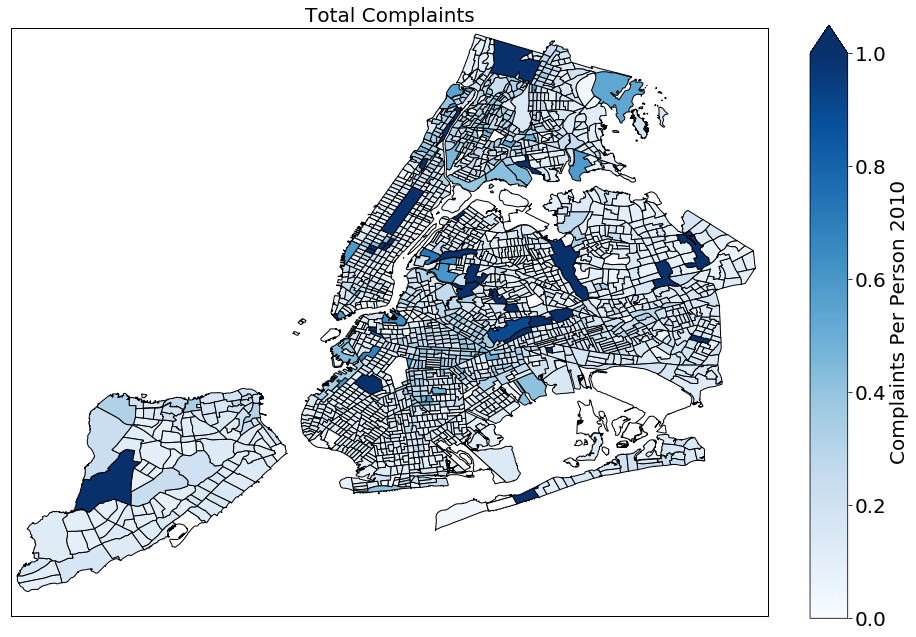

In [27]:
#cmap=mcm.YlOrRd
cmap=mcm.Blues
norm=mcolors.Normalize(vmin=0, vmax=1)
#norm=mcolors.Normalize(vmin=0,vmax=tracts['Population'].max())
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
ax.set_title(f"Total Complaints",fontsize=20)
for _, row in geopc.iterrows():
    try:
        cp = row['complaints']/row['Population']
        if not np.isfinite(cp):
            color="white"
        else:
            color = cmap(norm(cp))
    except ZeroDivisionError:
        color = "White"
    
    ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='black')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15, extend="max")
cb.ax.tick_params(labelsize=20)
cb.set_label("Complaints Per Person 2010", fontsize=20)

In [43]:
cp20 = geopc['complaints']/ geopc['Population']

In [49]:
cp20[np.isfinite(cp20)].max(), cp20[np.isfinite(cp20)].mean()

(68.0, 0.3260497011004437)

In [ ]:
pop['Population'].sum()

In [ ]:
ct['geometry'][0]

In [ ]:
mbta = mbt.copy()

In [ ]:
mbta['created_date'] = pd.to_datetime(mbt['created_date'])

In [ ]:
mbta['date'] = mbta['created_date'].dt.date

In [ ]:
pd.pivot_table(index=['complaint_type'], data=mbta[mbta['created_date'].dt.year == 2010])

30

boro_code boro_ct201      boro_name cdeligibil  ct2010 ctlabel  \
0            5    5000900  Staten Island          I  000900       9   
1            1    1009800      Manhattan          I  009800      98   
2            1    1010000      Manhattan          I  010000     100   
3            1    1010200      Manhattan          I  010200     102   
4            1    1010400      Manhattan          I  010400     104   
5            1    1011300      Manhattan          I  011300     113   
6            1    1011402      Manhattan          I  011402  114.02   
7            1    1013000      Manhattan          I  013000     130   
8            1    1014000      Manhattan          I  014000     140   
9            1    1014801      Manhattan          I  014801  148.01   
10           1    1015300      Manhattan          I  015300     153   
11           1    1015400      Manhattan          I  015400     154   
12           1    1018400      Manhattan          E  018400     184   
13           1    1019000      Manhattan          I  019000     190   
14           1    1020102      Manhattan          E  020102  201.02   
15           1    1020600      Manhattan          E  020600     206   
16           1    1024900      Manhattan          E  024900     249   
17           1    1025300      Manhattan          E  025300     253   
18           1    1025700      Manhattan          E  025700     257   
19           1    1026100      Manhattan          E  026100     261   
20           1    1026300      Manhattan          E  026300     263   
21           1    1026700      Manhattan          E  026700     267   
22           1    1026900      Manhattan          E  026900     269   
23           1    1027700      Manhattan          E  027700     277   
24           3    3000501       Brooklyn          I  000501    5.01   
25           3    3002000       Brooklyn          I  002000      20   
26           3    3004100       Brooklyn          I  004100      41   
27           3    3005202       Brooklyn          I  005202   52.02   
28           3    3005800       Brooklyn          E  005800      58   
29           3    3006000       Brooklyn          I  006000      60   
...        ...        ...            ...        ...     ...     ...   
2133         1    1031704      Manhattan          I  031704  317.04   
2134         1    1000900      Manhattan          I  000900       9   
2135         4    4066300         Queens          I  066300     663   
2136         4    4066501         Queens          I  066501  665.01   
2137         4    4056200         Queens          I  056200     562   
2138         4    4162100         Queens          I  162100    1621   
2139         4    4049900         Queens          E  049900     499   
2140         4    4050700         Queens          I  050700     507   
2141         5    5002001  Staten Island          I  002001   20.01   
2142         5    5003600  Staten Island          I  003600      36   
2143         5    5002002  Staten Island          I  002002   20.02   
2144         5    5005000  Staten Island          I  005000      50   
2145         4    4061800         Queens          I  061800     618   
2146         4    4063200         Queens          I  063200     632   
2147         4    4061602         Queens          I  061602  616.02   
2148         4    4063800         Queens          I  063800     638   
2149         3    3001100       Brooklyn          I  001100      11   
2150         3    3001500       Brooklyn          I  001500      15   
2151         2    2030701          Bronx          I  030701  307.01   
2152         2    2032300          Bronx          I  032300     323   
2153         4    4096400         Queens          I  096400     964   
2154         4    4097203         Queens          E  097203  972.03   
2155         4    4097202         Queens          E  097202  972.02   
2156         4    4097204         Queens          E  097204  972.04   
2157         5    5022300  St